In [ ]:
# https://www.kaggle.com/karnikakapoor/spam-or-ham-sms-classifier/notebook

In [13]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv("E:/Kaggle Practice/Spam or Ham/spam.csv")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
data['Unnamed: 2'].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
this wont even start........ Datz confidence.."                                                                                                     2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 PO Box 5249                                                                                                                                        2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 like you are the KING\"...! OR \"Walk like you Dont care                                           

In [17]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [18]:
# Drop redundent columns
to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# axis=1 은 열(columns) 기준으로 삭제

# Redname the columns
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
# inplace = True 는 지금 바로, 기존 데이터프레임에 변경된 설정으로 덮어쓰겠다
# 즉, inplace=Ture를 쓰면 객체를 만들지 않아도 된다. 'data =' 이런식으로 안써도된다.
# data = data.rename(columns={"v1":"Target", "v2":"Text"}) 이거와 동일하다
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Data Exploration

Text(0, 0.5, 'Number of Data points')

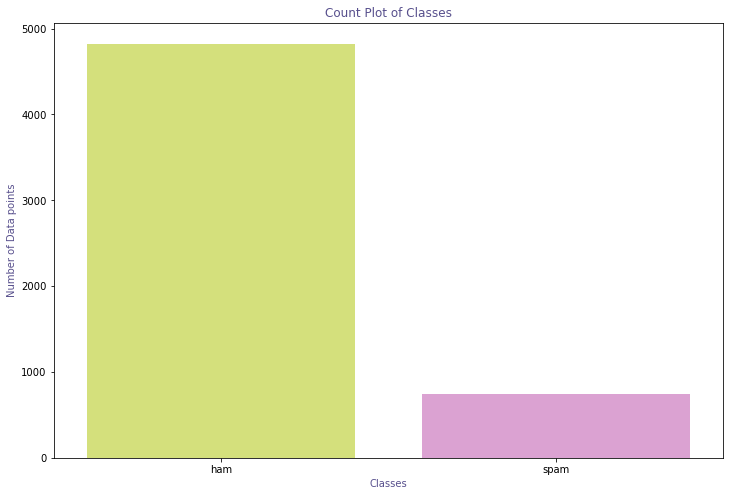

In [21]:
# Let us evaluate the 'Target' and find out if our data is imbalnced or not
cols = ["#E1F16B", "#E598D8"]
plt.figure(figsize=(12,8))
fg = sns.countplot(x=data["Target"], palette=cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

In [ ]:
# From the above countplot the data imbalance is quite evident

### Feature Engineering

In [ ]:
# For the purpose of data exploration, I am creating new features

# No_of_Characters: Number of characters in the text message
# No_of_Words: Number of words in the text message
# No_of_sentence: Number of sentences in the text message

In [22]:
# Adding a column of numbers of characters, words and sentences in each message
data["No_of_Characters"] = data['Text'].apply(len)
# apply 함수는 각 열에 연산을 하는 함수
data["No_of_Characters"]

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: No_of_Characters, Length: 5572, dtype: int64

In [25]:
print(data['Text'][1])

Ok lar... Joking wif u oni...


In [ ]:
# 위에 보면 1이 29인데 이게 글자 갯수를 의미
# 즉, data["No_of_Characters"]는 각 행의 글자 갯수를 의미한다

In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

data["No_of_Words"] = data.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
data["No_of_Words"]

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\kaitnam/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\kaitnam\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
